In [856]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [857]:
df=pd.read_csv("C:\\Users\\PRATHAMESH\\OneDrive\\Desktop\\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [858]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# After Filling the BMI NaN values with mean

In [859]:
df= df.fillna(df["bmi"].mean())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


# How many people are with hypertension

In [861]:
counts=df["hypertension"].value_counts()
counts

hypertension
0    4612
1     498
Name: count, dtype: int64

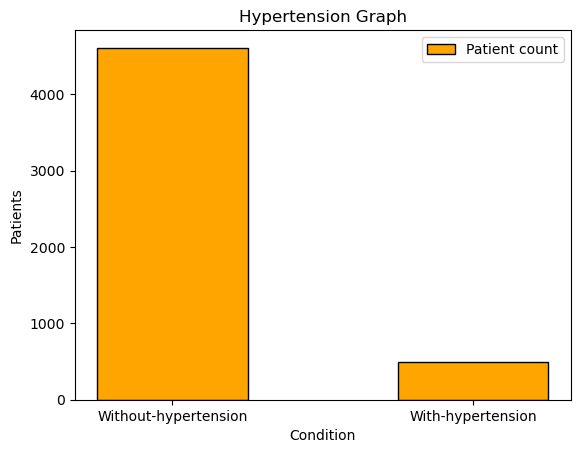

In [862]:
x=["Without-hypertension","With-hypertension"]
width=0.5
plt.bar(x,counts.values,width=width,color="orange",edgecolor="black")
plt.xlabel("Condition")
plt.ylabel("Patients")
plt.title("Hypertension Graph")
plt.legend(["Patient count"])
plt.show()

# Age and Blood glucose relation

In [863]:
mean_vals=df.groupby("age").mean("int")
mean_vals.head(3)

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,
0.08,38652.5,0.0,0.0,105.000000,15.500000,0.0
0.16,24208.0,0.0,0.0,98.006667,14.766667,0.0
0.24,48269.2,0.0,0.0,94.112000,17.400000,0.0


In [864]:
age_val=df["age"].unique().tolist()
age_val.sort()

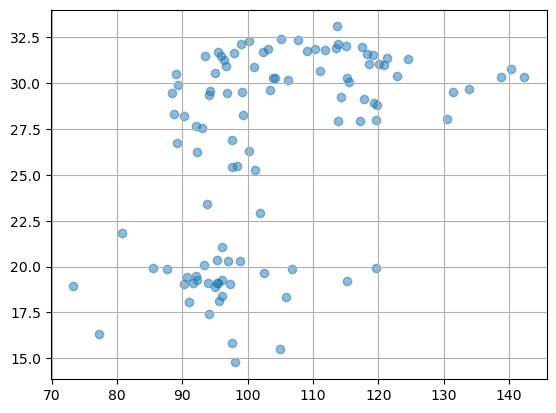

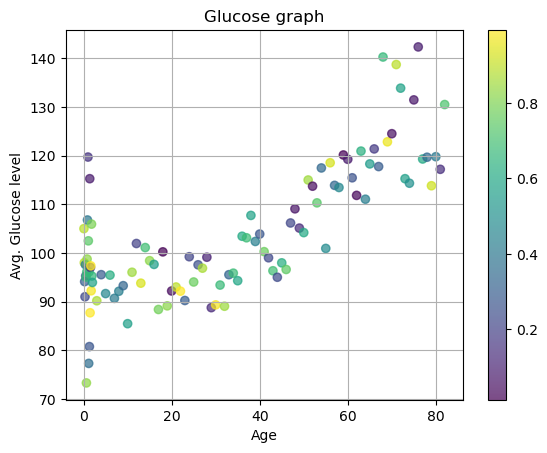

In [865]:
color=np.random.rand(104)

plt.scatter(age_val,mean_vals["avg_glucose_level"],c=color,cmap='viridis',alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Avg. Glucose level")
plt.title("Glucose graph")

plt.grid(True)

plt.colorbar()
plt.show()

# Age and BMI relation

In [866]:
mean_vals.head(3)

,id,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,,,,,,
0.08,38652.5,0.0,0.0,105.000000,15.500000,0.0
0.16,24208.0,0.0,0.0,98.006667,14.766667,0.0
0.24,48269.2,0.0,0.0,94.112000,17.400000,0.0


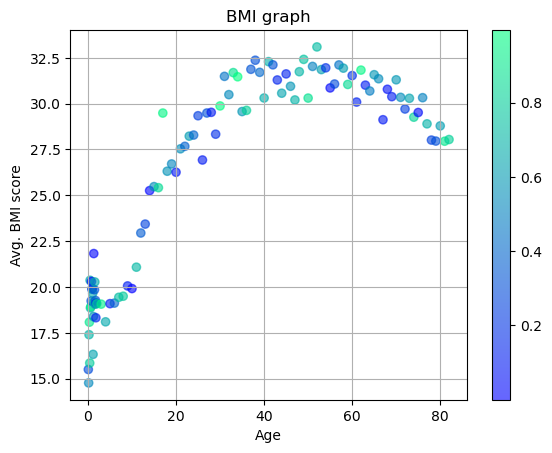

In [867]:
color=np.random.rand(104)
plt.scatter(age_val,mean_vals["bmi"],c=color,cmap="winter",alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Avg. BMI score")
plt.title("BMI graph")
plt.grid(True)
plt.colorbar()
plt.show()

# Hypertension & Stroke in Males vs Females

In [868]:
sum=df.groupby("gender").sum("int").drop("Other")
sum

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,,
Female,109220177,131009.64,276,113,311549.08,87006.143980,141
Male,77329775,89852.36,222,163,230722.22,60615.896639,108


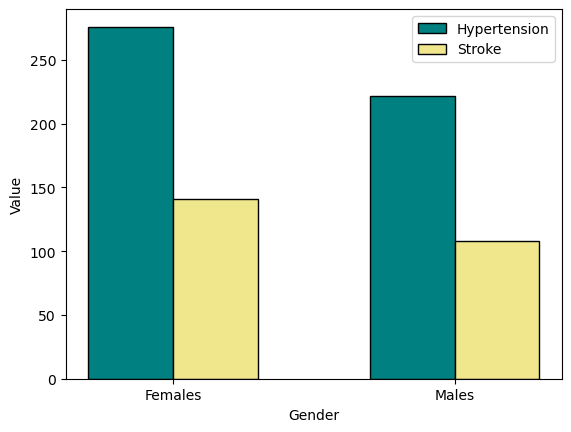

In [869]:
x=["Females","Males"]
y=sum["hypertension"]
z=sum["stroke"]

bar_width=0.30

bar1=np.arange(len(x))
bar2=bar1+bar_width

plt.bar(bar1,y,width=bar_width,color="teal",edgecolor="black",label="Hypertension")
plt.bar(bar2,z,width=bar_width,color="khaki",edgecolor="black",label="Stroke")

plt.xlabel("Gender")
plt.ylabel("Value")
plt.xticks(bar1+bar_width/2,x)

plt.legend()
plt.show()

# Pie Chart Smoking percentage

In [875]:
pie = df[df['smoking_status'] != 'Unknown']
pie_fig=pie[["smoking_status","Residence_type"]].value_counts()
pie_fig

smoking_status   Residence_type
never smoked     Rural             961
                 Urban             931
formerly smoked  Urban             457
                 Rural             428
smokes           Urban             426
                 Rural             363
Name: count, dtype: int64

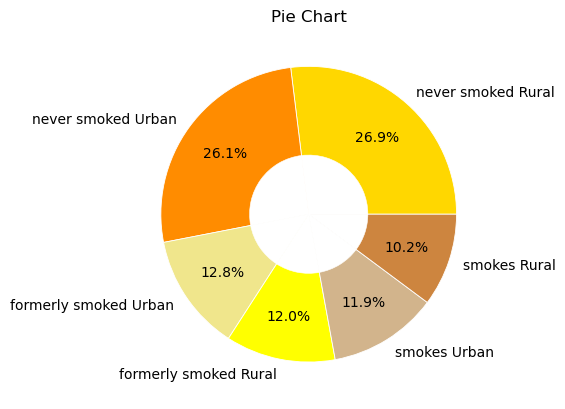

In [937]:
x=["never smoked Rural","never smoked Urban","formerly smoked Urban","formerly smoked Rural","smokes Urban","smokes Rural"]

wedgeprops = {'edgecolor': 'white', 'linewidth': 0.6}
wedgeprops1 = {'edgecolor': 'white', 'linewidth': 0.4}

color=["gold","darkorange","khaki","yellow","tan","peru"]
c=["white","white","white","white","white","white"]

plt.pie(pie_fig,labels=x,autopct="%1.1f%%",wedgeprops=wedgeprops,colors=color,radius=1,pctdistance=0.7)
plt.pie(pie_fig,radius=0.4,colors=c,wedgeprops=wedgeprops1)

plt.title("Pie Chart")
plt.show()

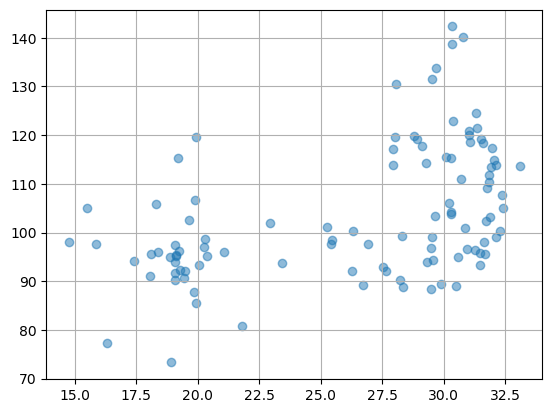

In [936]:
plt.scatter(mean_vals["bmi"],mean_vals["avg_glucose_level"],alpha=0.5)
plt.grid(True)
plt.show()